**1.Importing the libraries:**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**2.Importing csv file:**

In [2]:
data = pd.read_csv('/content/petrol.csv')
data.head()

,city,date,rate,state
0,Hyderabad,2011-12-01,73.07,Telangana
1,Hyderabad,2012-04-01,73.08,Telangana
2,Hyderabad,2012-05-24,81.44,Telangana
3,Hyderabad,2012-06-03,78.11,Telangana
4,Hyderabad,2012-06-29,74.89,Telangana


**3.Length of file:**

In [3]:
print("Length if the dataset:",len(data))
data.info()

Length if the dataset: 5048
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    5048 non-null   object 
 1   date    5048 non-null   object 
 2   rate    5048 non-null   float64
 3   state   5048 non-null   object 
dtypes: float64(1), object(3)
memory usage: 157.9+ KB


**4.Searching for Missing values:**

In [4]:
data.isnull()  #searching if null value is there or not
data.isnull().sum()  #this will find total missing values in each column separately :)
total_missing = data.isnull().sum().sum() #this will find total missing value in whole csv file :)

if total_missing > 0:
    print("\nRows with missing values:")
    print(data[data.isnull().any(axis=1)])
else:
    print("\nNo rows with missing values found.")


No rows with missing values found.


**4a.If missing value was there how to deal?(in our case we don't have so NO need to run)**

In [5]:
# Create a LabelEncoder object
#label_encoder = LabelEncoder()
#we use "fillna() for that and enter which column is having missing value that we wanna fill with mean or average:"
#imagine rate have missing value
#data['rate'].fillna('placeholder_value', inplace=True)

**5a.convert date column to datetime object:**

In [6]:
# Convert the 'Date' column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# Set the 'Date' column as the index
data.set_index('date', inplace=True)

# Check the data types to confirm the change
print(data.dtypes)


city      object
rate     float64
state     object
dtype: object


**4b.Visualize time series date:**

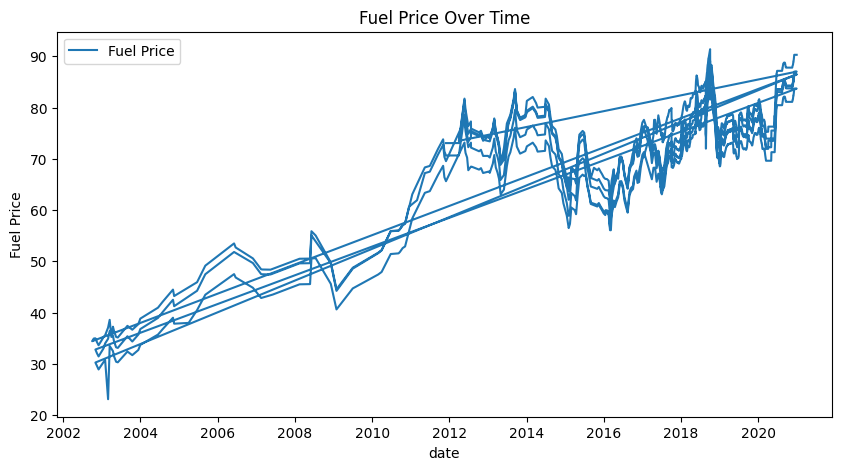

In [7]:
import matplotlib.pyplot as plt

# Plot the fuel prices over time
plt.figure(figsize=(10, 5))
plt.plot(data['rate'], label='Fuel Price')
plt.title('Fuel Price Over Time')
plt.xlabel('date')
plt.ylabel('Fuel Price')
plt.legend()
plt.show()


**4c. Feature Engineering with Dates:**

In [8]:
# Extract date-related features
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year
data['DayOfWeek'] = data.index.dayofweek


**4d.Prepare the Data:**

In [9]:
# Features (X) and target (y)
X = data[['Day', 'Month', 'Year', 'DayOfWeek']]
y = data['rate']


**5.Split the Data into Training and Test Sets**

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**6.RandomForestRegressor:**

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict fuel prices for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 2.400126483396419
Mean Squared Error: 8.872898300552661
Root Mean Squared Error: 2.9787410596681045


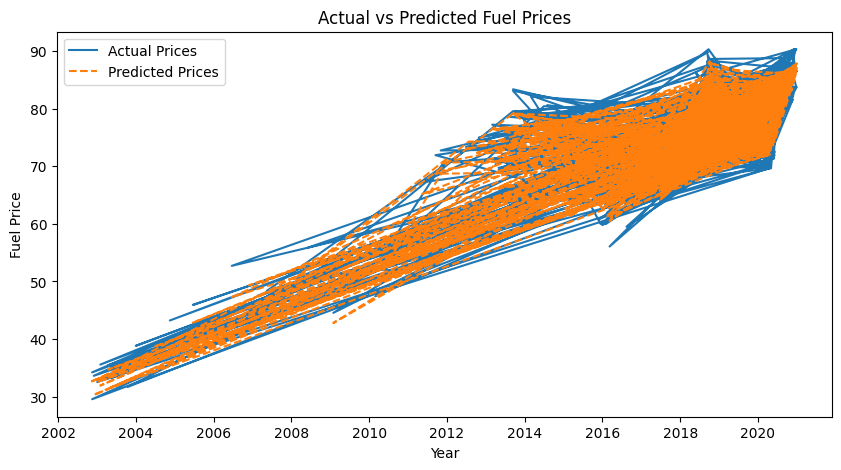

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices', linestyle='--')
plt.title('Actual vs Predicted Fuel Prices')
plt.xlabel('Year')
plt.ylabel('Fuel Price')
plt.legend()
plt.show()


**7.Linear & Logistic Regression:(Done by Poornashree)**

In [14]:
from sklearn.linear_model import LinearRegression, LogisticRegression
np.random.seed(42)
dates = pd.date_range(start='1/1/2023', periods=100)
rates = np.random.uniform(0.5, 1.5, size=(100,))
prices = 50 + rates * 10 + np.random.normal(0, 2, size=(100,))


**7a.Linear regression:**

In [15]:
data = pd.DataFrame({'Date': dates, 'Rate': rates, 'Price': prices})
data['Day'] = data['Date'].dt.dayofyear

In [16]:
X = data[['Day', 'Rate']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)

print(f"Linear Regression Mean Squared Error: {linear_mse:.2f}")

Linear Regression Mean Squared Error: 2.60


**7b.Logistic Regression:**

In [18]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score # Import accuracy_score

data['Price_Increase'] = data['Price'].diff().fillna(0) > 0
y_logistic = data['Price_Increase'].astype(int)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_logistic, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train_log, y_train_log)

y_pred_logistic = logistic_model.predict(X_test_log)
logistic_accuracy = accuracy_score(y_test_log, y_pred_logistic)

print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")

Logistic Regression Accuracy: 0.55


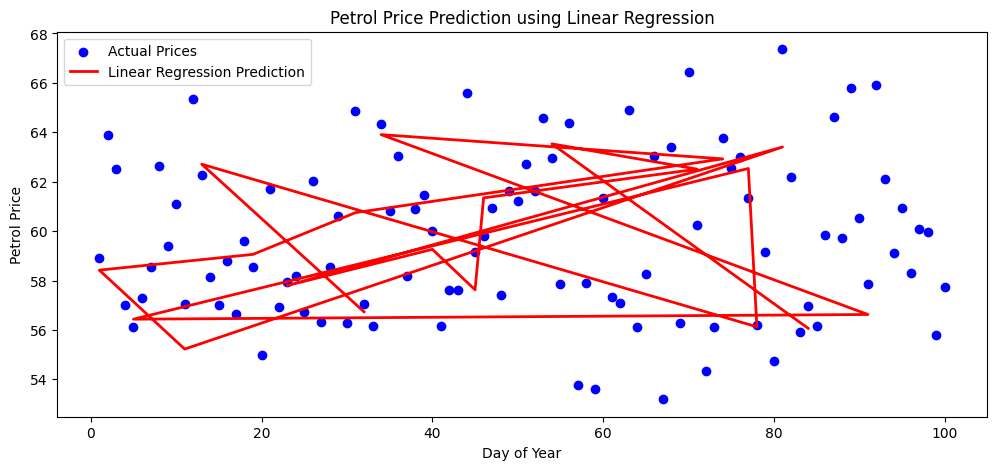

In [19]:
# Plotting the results
plt.figure(figsize=(12, 5))
plt.scatter(data['Day'], data['Price'], color='blue', label='Actual Prices')
plt.plot(X_test['Day'], y_pred_linear, color='red', linewidth=2, label='Linear Regression Prediction')
plt.xlabel('Day of Year')
plt.ylabel('Petrol Price')
plt.title('Petrol Price Prediction using Linear Regression')
plt.legend()
plt.show()

**8.Naive bayes & Gradiant Boosting:(Done by Parikishore)**

**8a.Naive Bayes Model:**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Import GaussianNB
from sklearn.metrics import accuracy_score


y_train_categorical = pd.cut(y_train, bins=bins, labels=labels)
y_test_categorical = pd.cut(y_test, bins=bins, labels=labels)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_categorical)
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test_categorical, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


**8b.Gradient Boosting Regression:**

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error (MAE): 1.4379308082803146
Mean Squared Error (MSE): 2.790024507688691
Root Mean Squared Error (RMSE): 1.6703366450176116
R^2 Score: 0.7140072292445445


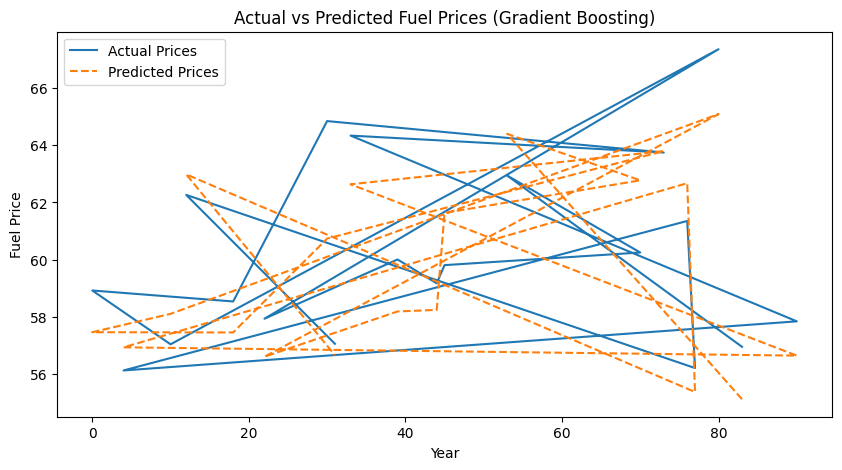

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices', linestyle='--')
plt.title('Actual vs Predicted Fuel Prices (Gradient Boosting)')
plt.xlabel('Year')
plt.ylabel('Fuel Price')
plt.legend()
plt.show()